# WEEK 2 QUIZ IDNN

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
import sklearn 
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf

## Reading the data

In [158]:
data = pd.read_csv("/content/drive/MyDrive/RootCSV/new_preprocessed_data.csv")


In [159]:
print(data.loan_status.value_counts())

0    300
2    100
1    100
Name: loan_status, dtype: int64


In [160]:
data.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


In [ ]:
#data = pd.get_dummies(data)
#data.head()

In [73]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

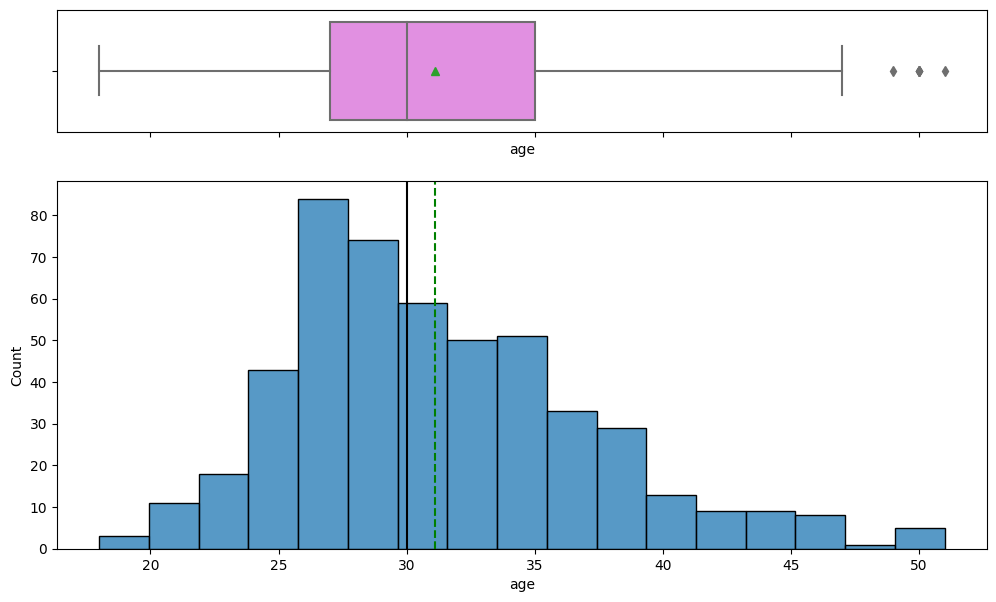

In [74]:
histogram_boxplot(data, "age")

In [187]:
X = data.drop('loan_status',axis=1)
Y = data['loan_status']

In [188]:
print(data.loan_status.value_counts())

0    300
2    100
1    100
Name: loan_status, dtype: int64


In [189]:
data.columns

Index(['loan_status', 'Principal', 'age', 'education_Bechalor',
       'education_High School or Below', 'education_Master or Above',
       'education_college', 'Gender_female', 'Gender_male', 'terms_7',
       'terms_15', 'terms_30'],
      dtype='object')

## OHE the target variables

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [191]:
sc=StandardScaler()
temp = sc.fit(X_train[["Principal"]])
X_train[["Principal"]] = temp.transform(X_train[["Principal"]])
X_test[["Principal"]] = temp.transform(X_test[["Principal"]])

In [192]:
sc=StandardScaler()
temp = sc.fit(X_train[["age"]])
X_train[["age"]] = temp.transform(X_train[["age"]])
X_test[["age"]] = temp.transform(X_test[["age"]])

In [28]:
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [ ]:
#model = keras.Sequential([
#    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
#    keras.layers.Dense(32, activation='relu'),
#    model.add(Dropout(0.2)),
#    keras.layers.Dense(64, activation='relu'),
#    keras.layers.Dense(32, activation='relu'),
#    keras.layers.Dense(y_train.shape[1], activation='softmax')
#])

In [ ]:
#optimizer = keras.optimizers.Adam(learning_rate=1e-3)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(X_train, y_train, epochs=20, validation_split=0.2,batch_size=32, verbose=0)

In [ ]:
#train_accuracy = history.history['accuracy'][-1]

In [ ]:
#print("Accuracy on the training data: {:.2f}%".format(train_accuracy * 100))

In [193]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
#from sklearn import preprocessing
 

In [194]:
X_train

,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
238,1000,29,0,0,0,1,0,1,0,1,0
438,1000,25,0,0,0,1,1,0,0,0,1
475,1000,35,0,0,0,1,1,0,0,0,1
58,800,44,0,1,0,0,1,0,0,1,0
380,1000,25,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
255,1000,31,0,0,0,1,0,1,0,0,1
72,1000,33,1,0,0,0,1,0,0,0,1
396,1000,33,0,1,0,0,0,1,0,0,1
235,1000,30,0,1,0,0,0,1,0,0,1


In [ ]:
#X_train = preprocessing.scale(X_train) 
#X_test = preprocessing.scale(X_test)

In [195]:
y_train

238    0
438    1
475    1
58     0
380    2
      ..
255    0
72     0
396    2
235    0
37     0
Name: loan_status, Length: 400, dtype: int64

In [196]:
y_test

304    2
340    2
47     0
67     0
479    1
      ..
11     0
192    0
92     0
221    0
110    0
Name: loan_status, Length: 100, dtype: int64

In [197]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 3
y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [198]:
print("First 3 training lables as one-hot encoded vectors:\n", y_train[:5])

First 3 training lables as one-hot encoded vectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [199]:
print("First 3 training lables as one-hot encoded vectors:\n", y_test[:5])

First 3 training lables as one-hot encoded vectors:
 304    2
340    2
47     0
67     0
479    1
Name: loan_status, dtype: int64


In [ ]:
#sc=StandardScaler()
#temp = sc.fit(X_train[["Principal"]])
#X_train[["Principal"]] = temp.transform(X_train[["Principal"]])
#X_test[["Principal"]] = temp.transform(X_test[["Principal"]])

In [ ]:
#sc=StandardScaler()
#temp = sc.fit(X_train[["age"]])
#X_train[["age"]] = temp.transform(X_train[["age"]])
#X_test[["age"]] = temp.transform(X_test[["age"]])

In [ ]:
# Z-score Normalizing
#from sklearn import preprocessing
#x_train__scaled = preprocessing.scale(X_train)
#x_test__scaled = preprocessing.scale(X_test)

In [200]:
y_train.shape[1]

3

In [201]:
X_train.shape[1]

11

## Definfing the sequential Model

In [202]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# create model
model = Sequential()  

model.add(Dense(128, activation='relu',input_shape=(X_train.shape[1],))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))

#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))

#model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(y_train.shape[1], activation='softmax')) ### For multiclass classification Softmax is used 

In [203]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
#adam = optimizers.Adam(learning_rate=1e-3)
#optprm = keras.optimizers.RMSprop(learning_rate=1e-3)
optprm = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=optprm, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [204]:
## Looking into our base model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1536      
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
#checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
 #                           save_weights_only=True, mode='max',verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

#callbacks = [checkpoint,reduce_lr]

In [205]:
# Fit the model
history=model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 1.5561 - accuracy: 0.2656 - val_loss: 4.6587 - val_accuracy: 0.2375 - 868ms/epoch - 289ms/step
Epoch 2/100
3/3 - 0s - loss: 1.3983 - accuracy: 0.2812 - val_loss: 1.6319 - val_accuracy: 0.2375 - 36ms/epoch - 12ms/step
Epoch 3/100
3/3 - 0s - loss: 1.3101 - accuracy: 0.3063 - val_loss: 0.9796 - val_accuracy: 0.6125 - 34ms/epoch - 11ms/step
Epoch 4/100
3/3 - 0s - loss: 1.2084 - accuracy: 0.3469 - val_loss: 1.2798 - val_accuracy: 0.6125 - 35ms/epoch - 12ms/step
Epoch 5/100
3/3 - 0s - loss: 1.1681 - accuracy: 0.3969 - val_loss: 1.7402 - val_accuracy: 0.6125 - 35ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 1.0901 - accuracy: 0.4219 - val_loss: 1.8274 - val_accuracy: 0.6125 - 34ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 1.0281 - accuracy: 0.5156 - val_loss: 1.8719 - val_accuracy: 0.6125 - 34ms/epoch - 11ms/step
Epoch 8/100
3/3 - 0s - loss: 1.0039 - accuracy: 0.5312 - val_loss: 1.9593 - val_accuracy: 0.6125 - 37ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s -

In [206]:
train_accuracy = history.history['accuracy'][-1]

In [207]:
print("Accuracy on the training data: {:.2f}%".format(train_accuracy * 100))

Accuracy on the training data: 62.19%


In [208]:
# predicting the model on test data
y_pred=model.predict(X_test)


4/4 [==============================] - 0s 2ms/step


In [209]:
y_pred[0]

array([0.677373  , 0.1449883 , 0.17763866], dtype=float32)

In [210]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [211]:
y_pred_final[0]


0

## Generating classification report

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        51
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        26

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100



## Confusion Matrix

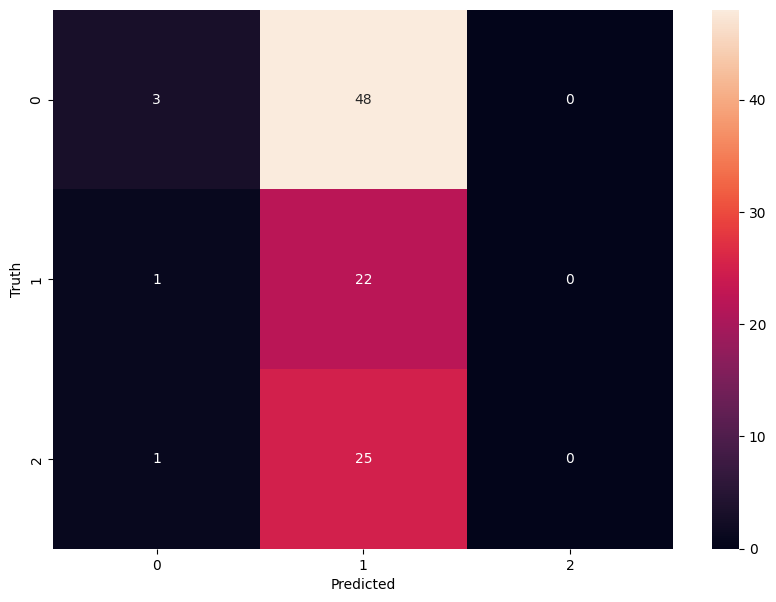

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Predicting the output

## Accuracy curve

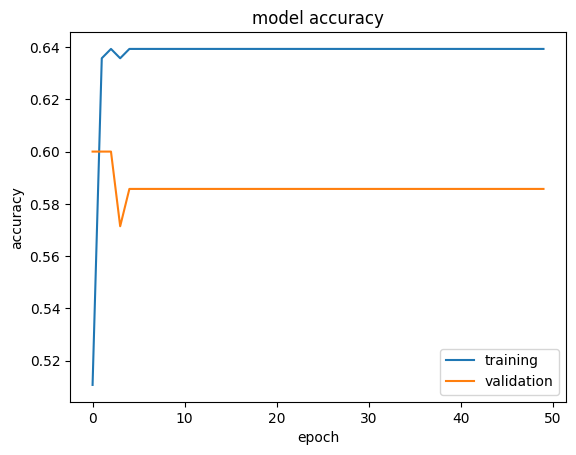

In [ ]:
loss, accuracy  = model.evaluate(X_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#### Happy Learning